In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

 Task 1: Load the dataset

In [ ]:
# Load the dataset
url = "https://raw.githubusercontent.com/ybifoundation/Dataset/main/Students%20Performance.csv"
df = pd.read_csv(url)

# Show first few rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Task 2: Remove constant features using Variance Threshold (cutoff = 0.5)

In [ ]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=[np.number])

# Apply Variance Threshold
vt = VarianceThreshold(threshold=0.5)
vt.fit(numeric_df)

# Filter columns with variance above threshold
filtered_cols = numeric_df.columns[vt.get_support()]
df = df[filtered_cols.union(df.select_dtypes(exclude=[np.number]).columns)]

print("Remaining columns after variance threshold:\n", df.columns.tolist())

Remaining columns after variance threshold:
 ['gender', 'lunch', 'math score', 'parental level of education', 'race/ethnicity', 'reading score', 'test preparation course', 'writing score']


Task 3: Handle Missing Values

In [10]:
# Introduce some missing values artificially for demonstration
df.loc[2:5, 'math score'] = np.nan
df.loc[10, 'gender'] = np.nan

# Replace missing numerical values with mean
for col in df.select_dtypes(include=[np.number]):
    df[col].fillna(df[col].mean(), inplace=True)

# Replace missing categorical values with mode
for col in df.select_dtypes(include=[object]):
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()

,0
gender,0
lunch,0
math score,0
parental level of education,0
race/ethnicity,0
reading score,0
test preparation course,0
writing score,0


 Task 4: Remove outliers using IQR method (at least 2 numerical columns)

In [7]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Apply to two columns
df = remove_outliers_iqr(df, 'math score')
df = remove_outliers_iqr(df, 'reading score')

Task 5: Generate plots


A. Pairplot

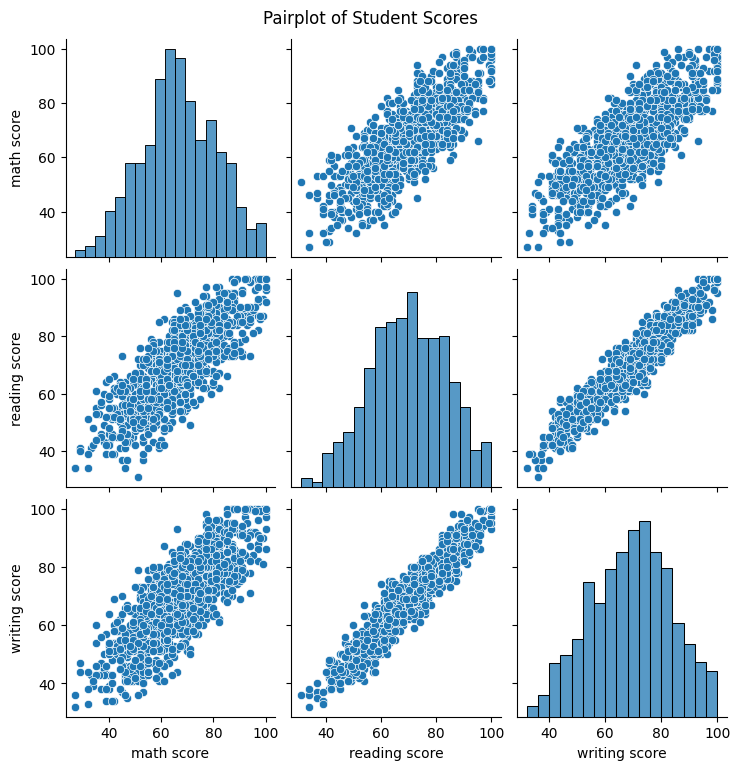

In [8]:
# Pairplot for numerical columns
sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.suptitle("Pairplot of Student Scores", y=1.02)
plt.show()


B. Heatmap of Correlation Matrix

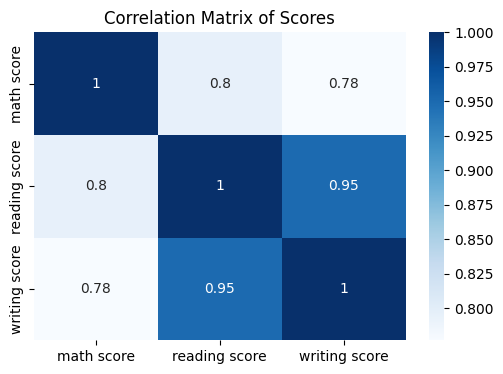

In [9]:
# Correlation matrix
corr = df[['math score', 'reading score', 'writing score']].corr()

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Matrix of Scores")
plt.show()
